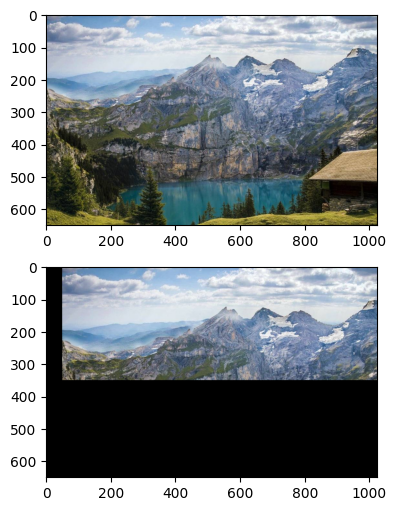

In [4]:
import imageio.v3 as img
import numpy as np
import matplotlib.pyplot as plt

def Translasi(image, shiftX, shiftY):
    imgTranslasi = np.roll(image, shift=shiftY, axis=0)
    imgTranslasi = np.roll(image, shift=shiftX, axis=1)

    if shiftY > 0:
        imgTranslasi[:shiftY, :] = 0
    elif shiftY < 0:
        imgTranslasi[shiftY:, :] = 0
    if shiftX > 0:
        imgTranslasi[:, :shiftX] = 0
    elif shiftX < 0:
        imgTranslasi[:, shiftX:] = 0

    return imgTranslasi

image = img.imread('/content/pmd.jpg')
imgTranslasi = Translasi(image, shiftX=50, shiftY=-300)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.imshow(image)

plt.subplot(2,1,2)
plt.imshow(imgTranslasi)

plt.show()

<ipython-input-2-d4440ac9088d>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread(path)


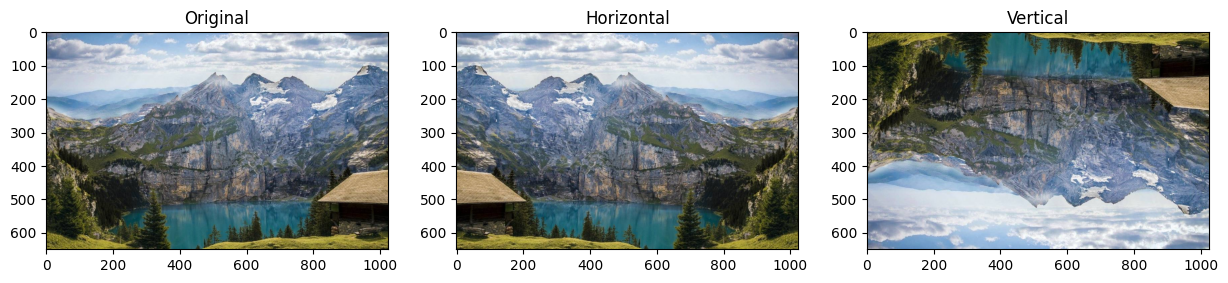

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as img

path = "/content/pmd.jpg"
image = img.imread(path)

height, width = image.shape[:2]
horizontal = np.zeros_like(image)
vertical = np.zeros_like(image)

for y in range(height):
    for x in range(width):
        horizontal[y, x] = image[y, width - 1 - x]


for y in range(height):
    for x in range(width):
        vertical[y, x] = image[height - 1 - y, x]

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(horizontal)
plt.title("Horizontal")

plt.subplot(1,3,3)
plt.imshow(vertical)
plt.title("Vertical")

plt.show()

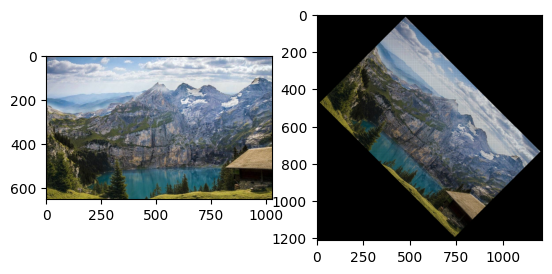

In [3]:

import numpy as np
import imageio.v3 as img
import matplotlib.pyplot as plt

def rotateImage(image, degree):
    radian_deg = np.radians(degree)
    cos_deg, sin_deg = np.cos( radian_deg), np.sin(radian_deg)

    height, width = image.shape[:2]
    max_dim = int(np.sqrt(height**2 + width**2))
    outputImage = np.zeros((max_dim, max_dim, 3), dtype=image.dtype)

    centerY, centarX = max_dim//2, max_dim//2

    for y in range(-height//2, height//2):
        for x in range(-width//2, width//2):
            newX = int(cos_deg * x - sin_deg * y) + centarX
            newY = int(sin_deg * x + cos_deg * y) + centerY

            if 0 <= newX < max_dim and 0 <= newY < max_dim:
                outputImage[newY, newX] = image[y + height//2, x + width//2]
    return outputImage

image = img.imread('/content/pmd.jpg')
rotate_image = rotateImage(image, 45)

plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(rotate_image)

plt.show()


<ipython-input-5-92756ce7b6a0>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread('/content/pmd.jpg')


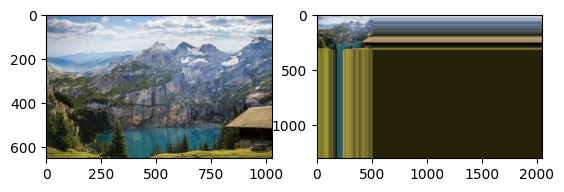

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as img

def zoomPlus(image, factor):
    height, width = image.shape[:2]
    new_height = int(height * factor)
    new_width = int(width * factor)
    imgZoom = np.zeros((new_height, new_width, 3), dtype=image.dtype)

    for y in range(new_height):
        for x in range(new_width):

            ori_y = int(y * factor)
            ori_x = int(x * factor)

            ori_y = min(ori_y, height - 1)
            ori_x = min(ori_x, width - 1)
            imgZoom[y, x] = image[ori_y, ori_x]
    return imgZoom

image = img.imread('/content/pmd.jpg')
skala = 2.0

imgZoom = zoomPlus(image, skala)
img.imwrite("/content/zoom_pmd.jpg", imgZoom)
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(imgZoom)

plt.show()

<ipython-input-6-7c48f4ad6d90>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread(path)


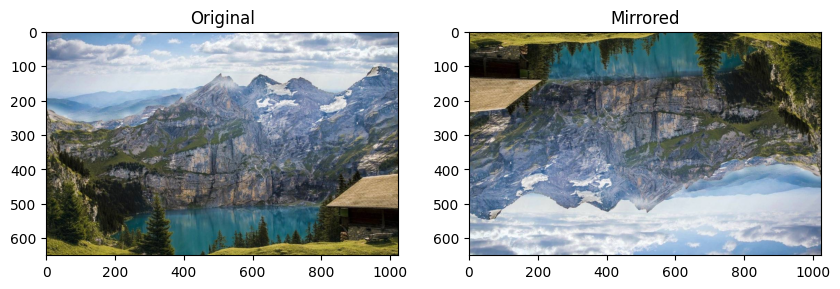

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as img

path = "/content/pmd.jpg"
image = img.imread(path)

height, width = image.shape[:2]
mirrored = np.zeros_like(image)

for y in range(height):
    for x in range(width):
        mirrored[y, x] = image[height - 1 - y, width - 1 - x]  # Vertical + Horizontal

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(mirrored)
plt.title("Mirrored")

plt.show()


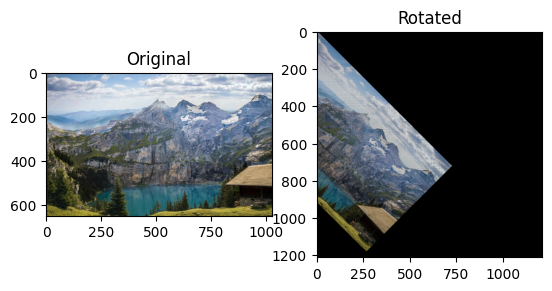

In [7]:
import numpy as np
import imageio.v3 as img
import matplotlib.pyplot as plt

def rotateImage(image, degree):
    radian_deg = np.radians(degree)
    cos_deg, sin_deg = np.cos(radian_deg), np.sin(radian_deg)

    height, width = image.shape[:2]
    max_dim = int(np.sqrt(height**2 + width**2))
    outputImage = np.zeros((max_dim, max_dim, 3), dtype=image.dtype)

    # Pivot at (0,0)
    for y in range(height):
        for x in range(width):
            newX = int(cos_deg * x - sin_deg * y)
            newY = int(sin_deg * x + cos_deg * y)

            if 0 <= newX < max_dim and 0 <= newY < max_dim:
                outputImage[newY, newX] = image[y, x]  # Using (y, x) directly

    return outputImage

image = img.imread('/content/pmd.jpg')
rotate_image = rotateImage(image, 45)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(rotate_image)
plt.title("Rotated")

plt.show()


<ipython-input-8-4784c2bb9263>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread('/content/pmd.jpg')


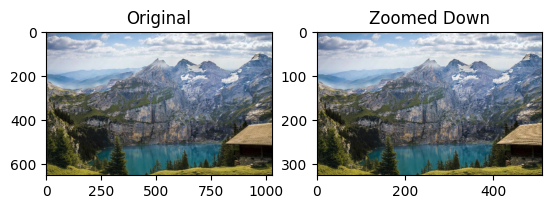

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as img

def zoomMinus(image, factor):
    height, width = image.shape[:2]
    new_height = int(height / factor)
    new_width = int(width / factor)
    imgZoom = np.zeros((new_height, new_width, 3), dtype=image.dtype)

    for y in range(new_height):
        for x in range(new_width):
            ori_y = int(y * factor)
            ori_x = int(x * factor)

            ori_y = min(ori_y, height - 1)
            ori_x = min(ori_x, width - 1)
            imgZoom[y, x] = image[ori_y, ori_x]

    return imgZoom

image = img.imread('/content/pmd.jpg')
scale = 2.0

imgZoom = zoomMinus(image, scale)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(imgZoom)
plt.title("Zoomed Down")

plt.show()
